

<h1><center><strong>Twitter Sentiment Analysis</strong></center></h1>

# **Table of Contents**

1. [Introduction](#Section1)<br>
2. [Problem Statement](#Section2)<br>
3. [Importing Libraries](#Section3)<br>
  - 3.1 [Installing Libraries](#Section301)<br>
  - 3.2 [Importing Libraries](#Section302)<br>
4. [Data Loading and Dataset Description](#Section4)<br>
  - 4.1 [Data Loading](#Section401)<br>
  - 4.2 [Dataset Information](#Section402)<br>
  - 4.3 [Dataset Description](#Section403)<br>
  - 4.4 [Sweet Viz report](#Section404)<br>
5. [Data Pre-Processing](#Section5)<br>
  - 5.1 [Checking the Missing Data](#Section501)<br>
  - 5.2 [Cleaning the data](#Section502)<br>
  - 5.3 [Calculating Polarity and Subjectivity of Reviews](#Section503)<br>
  - 5.4 [Sweet Viz report after Data Processing](#Section504)<br>
6. [Exploratory Data Analysis](#Section6)<br>
7. [Post Data Processing & Analysis](#Section7)<br>
  - 7.1 [Removing Redundant Columns](#Section701)<br>
  - 7.2 [Removing Samples Having Subjectivity Less Than 0.3](#Section702)<br>
8. [Model Development & Evaluation](#Section801)<br>
    - 8.1 [Logistic regression](#Section801)<br>
    - 8.2 [TF-IDF Matrix](#Section80102)<br>
    - 8.3 [K-Means](#Section80103)<br>
9. [Conclusion](#Section9)<br>

<a id = Section1></a>
## **1. Introduction**

- **Sentiment is the emotion behind customer engagement.** 

- When you monitor sentiment, you try to measure the **tone**, **context**, and **feeling** from customer actions.

- Whether a customer completes a purchase, leaves a review, or mentions your company socially, there is always an **emotional state** connected to their action.

- Customer sentiment can range anywhere from **pleased** or **loving** to **neutral** or **angry**, and no matter where your customers fall on the sentiment spectrum, it’s imperative you understand not only what their emotional state is, but what’s driving it. 


<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Retail/Images/sentiment.jpg" width="600px"></center>

<a id = Section2></a>
## **2. Problem Statement**

- **Analyzing Twitter sentiment** helps give **insight** into how **Users feel** about a particular event/issue. 




<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Retail/Images/sentiment2.jpg" width="600px""></center>

<a id = Section3></a>
## **3. Importing Libraries**

<a id = Section301></a>
### **3.1 Installing Libraries**

In [ ]:
#! pip install nltk

In [ ]:
#!pip install sweetviz

<a id = Section302></a>
### **3.2 Importing Libraries**

In [1]:
# For Numerical Python
import numpy as np

# For Panel Data Analysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.precision', 4)

import sweetviz as sv

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# import Natural language Toolkit
import nltk

# To Disable Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from wordcloud import WordCloud
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

from scipy import stats
from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression

<a id = Section4></a>
## **4. Data Loading and Dataset Description**

- We are provided with a **Tweets** data. the objective is to use NLP approach for sentiment analysis
- The Sentiments are categorized in 'Negative','Neutral','Positive'tones.


<br> 

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 1,62,976 | 2 | 2.5+ MB| 

<br> 

| Column | Description |
| :--:| :--: | 
| **clean_text** | Tweet by a user |
| **category** | Negative(-1),Neutral(0),Positive(1) tone |

<a id = Section401></a>
### **4.1 Data Loading**

In [3]:
tweet=pd.read_csv('../input/Twitter_Data.csv')
tweet.head(7)

,clean_text,category
0,when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples,-1.0
1,talk all the nonsense and continue all the drama will vote for modi,0.0
2,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,1.0
3,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars,1.0
4,answer who among these the most powerful world leader today trump putin modi may,1.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace for narendra modi become again\n,0.0


<a id = Section402></a>
### **4.2 Dataset Information**

In [4]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


**Observations:**

- There are a total of **162976 rows** in the data.

- The dataset contains **2 columns**.

- There is **1 numerical** column, and **1 object** type column.


<a id = Section403></a>
### **4.3 Dataset Description**

In [5]:
tweet.describe()

,category
count,162973.0000
mean,0.2254
std,0.7813
min,-1.0000
25%,0.0000
50%,0.0000
75%,1.0000
max,1.0000


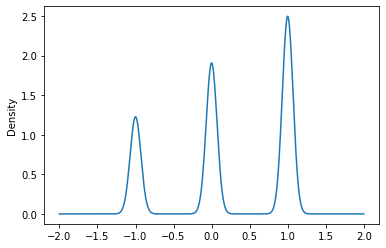

In [6]:
tweet.category.plot(kind='kde');

**Observations:**

- clean_text column in the dataset contain **textual data** and hence are not shown in the `describe` function output.

- **category** column has three distinct values -1,0,1 .
  
  


<a id = Section404></a>
### **4.4 Sweet Viz Report before Data Preprocessing**

- Using **Sweet-Viz** to quickly *analyse* our data.

- This will take some time.

In [7]:
sweet_report = sv.analyze(tweet)
sweet_report.show_html('sweet_report_sentiments.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report_sentiments.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Observations:**

- There are **2 Features** and **162980 observations** in the dataset.

- There are **11 missing** observations  in the data (4 in **clean_text** and 7 in **category**).

- Of all the 2 variables **1** is **text**,and **1** is **category**.

- `clean_text` column has a high cardinality with **162976** distinct values.

- `category` column has a low cardinality with **3** distinct values.


<a id = Section5></a>
## **5. Data Pre-Processing**

<a id = Section501></a>
### **5.1 Checking the Missing Data**

In [8]:
Nandata=tweet.columns[tweet.isnull().any()].tolist()  # Checking for NAN values in DF
for i in Nandata:
    print('Nan Values from Column:',i)              # The code helps in getting the columns and their  Nan values as observed in Pre profile report
    display(tweet[tweet[i].isnull()==True])    

Nan Values from Column: clean_text


,clean_text,category
148,NaN,0.0
158694,NaN,-1.0
159443,NaN,0.0
160560,NaN,1.0


Nan Values from Column: category


,clean_text,category
130448,the foundation stone northeast gas grid inaugurated modi came major,NaN
155642,dear terrorists you can run but you cant hide are giving more years modi which you won’ see you,NaN
155698,offense the best defence with mission shakti modi has again proved why the real chowkidar our,NaN
155770,have always heard politicians backing out their promises but modi has been fulfilling his each every,NaN
158693,modi government plans felicitate the faceless nameless warriors india totally deserved,NaN
159442,chidambaram gives praises modinomics,NaN
160559,the reason why modi contested from seats 2014 and the real reason why rahul doing the same now,NaN


<a id = Section502></a>
### **5.2 Cleaning the data**

In [9]:
tweet.drop(tweet[tweet['clean_text'].isna()].index, inplace=True)
tweet.drop(tweet[tweet['category'].isna()].index, inplace=True)

In [10]:
tweet.isna().sum()

clean_text    0
category      0
dtype: int64

- We can see `clean_text and category` columns contain no missing data.

<a id = Section503></a>
### **5.3 Calculating Polarity and Subjectivity of Tweets**

- **Polarity** is a float value within the range **[-1.0 to 1.0]**.
  
  - Here, **0** indicates **neutral**,
  
  - **+1** indicates a **very positive** sentiment, and
  
  - **-1** represents a **very negative** sentiment.

- **Subjectivity** is a float value within the range **[0.0 to 1.0]**.

  - Here, **0.0** is **very objective**, and
  
  - **1.0** is **very subjective**. 
  
  - **Subjective** sentence **express** some *personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations*.

  - **Objective** sentences are **factual**.

- We will use `textblob` library's **TextBlob** class to find the **polarity** and **subjectivity** values for each review.

In [11]:
for review in tweet['clean_text'][0:40]:
    blob = TextBlob(review)
    print(review, ': ', blob.sentiment, '\n')

when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples :  Sentiment(polarity=-0.3, subjectivity=0.7) 

talk all the nonsense and continue all the drama will vote for modi  :  Sentiment(polarity=0.0, subjectivity=0.0) 

what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax :  Sentiment(polarity=0.48333333333333334, subjectivity=0.6166666666666667) 

asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars :  Sentiment(polarity=0.15, subjectivity=0.6583333333333333) 

answer who among these the most powerful world leader today trump putin modi may  :  Sentiment(polarity=0.4, subjectivity=0.75) 

kiya tho refresh maarke

- Here, we can see the *polarity* and *subjectivity* values for the **first 5 reviews** in the dataset.

- **First 5** reviews have a **mixed sentiment** according to the polarity values.


**Calculating the Polarity and Subjectivity of Cleaned Reviews**

- Using TextBlob to **calculate** the **polarity**  and **subjectivity** values for each cleaned review.

- These values are then **appended** to `polarity` and `subjectivity` lists.

- This will take some time.

In [12]:
%%time
polarity = []
subjectivity = []

for review in tweet['clean_text']:
    blob = TextBlob(review)
    polarity.append(blob.sentiment.polarity)
    subjectivity.append(blob.sentiment.subjectivity)

Wall time: 1min 1s


- **Adding** the polarity and subjectivity values to `polarity` and `subjectivity` columns in the dataset.

In [13]:
tweet['polarity'] = polarity
tweet['subjectivity'] = subjectivity

In [14]:
tweet.head(10)

,clean_text,category,polarity,subjectivity
0,when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples,-1.0,-0.3000,0.7000
1,talk all the nonsense and continue all the drama will vote for modi,0.0,0.0000,0.0000
2,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,1.0,0.4833,0.6167
3,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars,1.0,0.1500,0.6583
4,answer who among these the most powerful world leader today trump putin modi may,1.0,0.4000,0.7500
5,kiya tho refresh maarkefir comment karo,0.0,0.0000,0.0000
6,surat women perform yagna seeks divine grace for narendra modi become again\n,0.0,0.0000,0.0000
7,this comes from cabinet which has scholars like modi smriti and hema time introspect,0.0,0.0000,0.0000
8,with upcoming election india saga going important pair look current modi leads govt elected with deal brexit combination this weekly looks juicy bears imho,1.0,0.2000,0.7000
9,gandhi was gay does modi,1.0,0.4167,0.5833


- We can see that the **polarity** and **subjectivity** values for each cleaned review in the `polarity` and `subjectivity` columns respectively.

<a id = Section504></a>
### **5.4 Sweet viz after Data processing**

- Using **Sweetviz** to *analyse* our data again after Data Preprocessing.


In [15]:
sweet_report = sv.analyze(tweet)
sweet_report.show_html('sweet_report_afterclean.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report_afterclean.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Observations:**

- There are **4 Features** and **162969 observations** in the dataset.

- Of all the 4 Features **1** is **text**, **1** is **categorical**, **2** are **continuous**.

- There are **2 new columns** in the dataset: `polarity`, and `subjectivity`.

- `polarity` has a **mean** of **0.08** and a **median** of **0.0**

  - It is almost **normally distributed**.

  - The **5-th percentile** value is **-0.3**, and the **95-th percentile** value is **0.6**, which implies that most of the tweets have a positive sentiment.

- `subjectivity` has a **mean** of **0.38** and a **median** of **0.40**.Most of the Tweets are objective in nature

  - It is **normally distributed** having values between the **range 0 to 1**.

<a id = Section6></a>
## **6. Exploratory Data Analysis**

### **Question 1: How are the Polarity values distributed for the Tweets?** 

Text(0.5, 1.0, 'Distribution of Polarity Values')

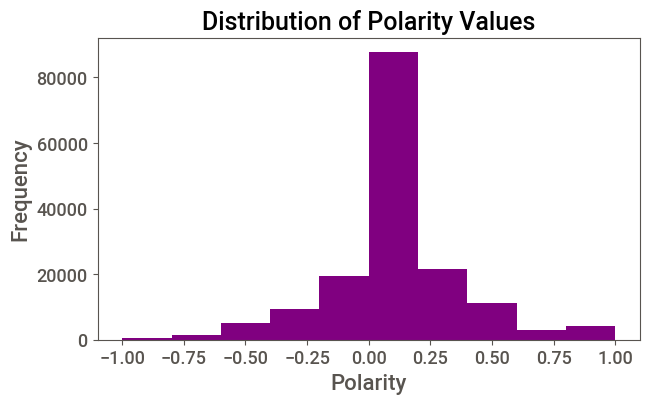

In [16]:
plt.figure(figsize=(7, 4))
tweet['polarity'].plot(kind='hist', color='Purple', fontsize=13)
plt.xlabel('Polarity', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Polarity Values', fontsize=18)

**Observations:**

- **Most** of the **polarity values** are **greater than 0**, and only a small proportion of values have a polarity less than 0.

- It is evident that **most tweets** have a **positive sentiment** based on the polarity values.


### **Question 2: How are the Tweets distributed into Sentiments based on Polarity?** 

- Reviews having:
  - a **negative polarity** will have a **negative sentiment**,
  
  - **zero** polarity will have a **neutral sentiment**, and
  
  - **positive** polarity will have a **positive sentiment**.

In [17]:
print('Tweets with Negative Sentiment based on Polarity:', len(tweet[tweet['polarity'] < 0]),'({:.1f}%)'.format(len(tweet[tweet['polarity'] < 0])/len(tweet)*100))
print('Tweets with Neutral Sentiment based on Polarity:', len(tweet[tweet['polarity'] == 0]),'({:.1f}%)'.format(len(tweet[tweet['polarity']==0])/len(tweet)*100))
print('Tweets with Positive Sentiment based on Polarity:', len(tweet[tweet['polarity'] > 0]),'({:.1f}%)'.format(len(tweet[tweet['polarity'] > 0])/len(tweet)*100))

Tweets with Negative Sentiment based on Polarity: 35509 (21.8%)
Tweets with Neutral Sentiment based on Polarity: 55213 (33.9%)
Tweets with Positive Sentiment based on Polarity: 72247 (44.3%)


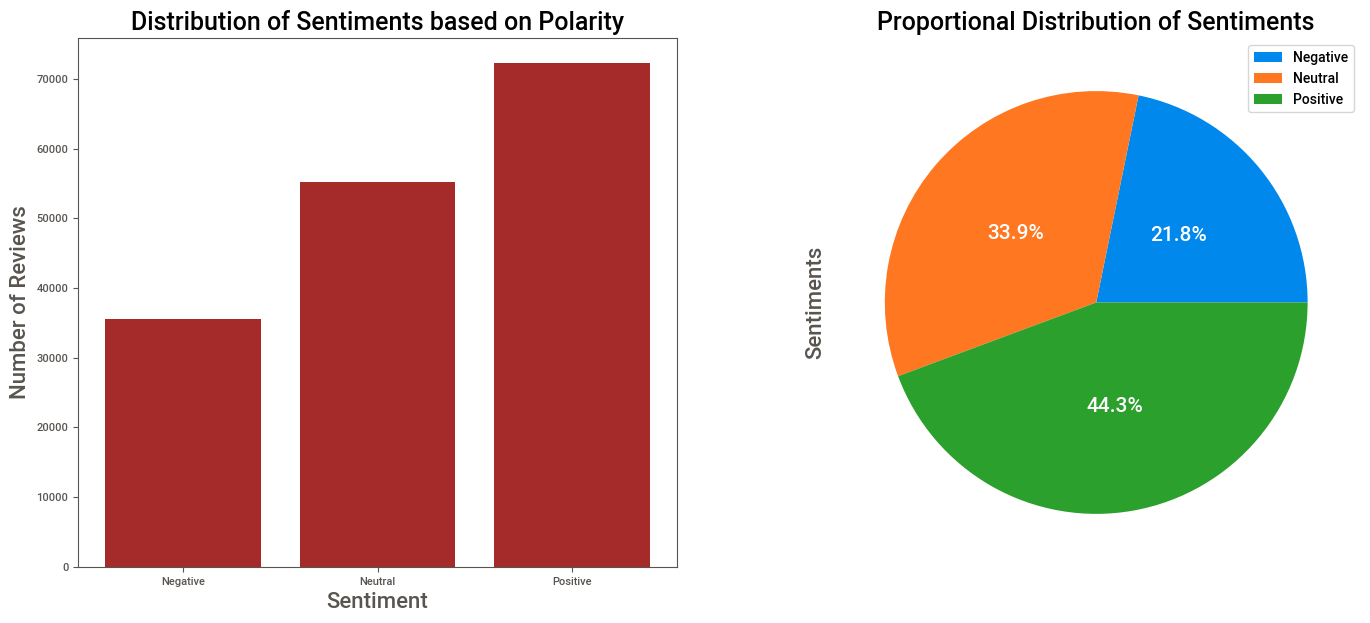

In [18]:
# Plotting the Count and Proportional Distribution of tweets based on sentiment as per polarity
plt.figure(figsize=(17, 7))
plt.subplot(1, 2, 1)

# Plotting the count of reviews for each sentiment
plt.bar(['Negative', 'Neutral', 'Positive'], [len(tweet[tweet['polarity'] < 0]), len(tweet[tweet['polarity'] == 0]), 
                                              len(tweet[tweet['polarity'] > 0])], color='brown')
plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('Number of Reviews', fontsize=16)
plt.title('Distribution of Sentiments based on Polarity', fontsize=18)

plt.subplot(1, 2, 2)

# Plotting the proportional distribution of sentiments
plt.pie(x=[len(tweet[tweet['polarity'] < 0]), len(tweet[tweet['polarity'] == 0]),
           len(tweet[tweet['polarity'] > 0])], 
        labels=['Negative', 'Neutral', 'Positive'], autopct='%1.1f%%', pctdistance=0.5,
        textprops={'fontsize':15, 'color':'white'})
plt.ylabel('Sentiments', fontsize=16)
plt.title('Proportional Distribution of Sentiments', fontsize=18)
plt.legend()

**Observations:**

- Based on the polarity values, **44.3% tweets** have a **positive sentiment**.

- **21.8%** tweets have a **negative** sentiment and **33.9%** tweets have a **neutral** sentiment.

### **Question 3: Is there any Correlation between the Subjectivity and the Polarity of Reviews?** 

In [19]:
tweet[['subjectivity', 'polarity']].corr()

,subjectivity,polarity
subjectivity,1.0000,0.1843
polarity,0.1843,1.0000


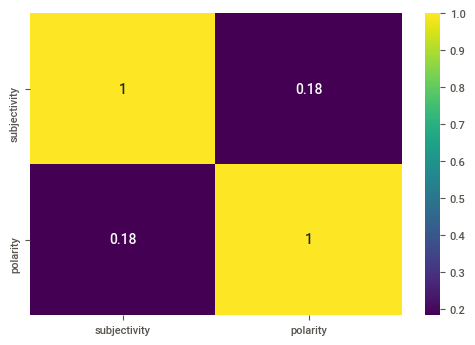

In [20]:
plt.figure(figsize=(6, 4))
sns.heatmap(tweet[['subjectivity', 'polarity']].corr(), annot=True, cmap='viridis');

**Observations:**

- `subjectivity` and `polarity` have a **positive correlation** of **0.18**

- This **isn't a strong positive correlation**, but is a positive correlation nonetheless.

### **Question 4: How are the tweets based on high/low polarity and high/low subjectivity?** 

- Showing some reviews having **maximum negative polarity** at **-1**.

In [21]:
for review in tweet[tweet['polarity'] == -1]['clean_text'][:5]:
    print(review, '\n')

bjps chanakya work this very ruthless attitude the modishah duo ❤ 

please vote which below made your life miserable under modi govt  

indias rupee goes from asias worst bestperforming currency just five weeks via  

guys you don’ have any reason vote then please read and understand this you got reason vote for modi save yourself from this horrible unimaginable nightmare  

malnutrition india narendra modi and rahul gandhi’ constituencies are among the worst affected via  



- We can clearly observe a **negative sentiment** in these reviews.

- Showing some tweets having a **high polarity**.

In [22]:
for review in tweet[tweet['polarity'] == 1]['clean_text'][:5]:
    print(review, '\n')

superbly summarizedjai hind vande mataramagain modi sarkar  

east west modi best 

one the best ministers modis cabinet  

this awesome step guys the appeal modi shri jai bhagwan goyal adopted barsana village 

you account credited guess all the best and keep reporting your selective outrage keep blaming modi for issues level  



- These tweets are showing a **positive sentiment** 

- Showing some tweets having a **neutralpolarity**.

In [23]:
for review in tweet[(tweet['polarity'] == 0)]['clean_text'][:5]:
    print(review, '\n')

talk all the nonsense and continue all the drama will vote for modi  

kiya tho refresh maarkefir comment karo  

surat women perform yagna seeks divine grace for narendra modi become again
 

this comes from cabinet which has scholars like modi smriti and hema time introspect 

one vote can make all the difference anil kapoor answers modis election 2019 clarion call extends support his vote kar campaign  



**Observations:**

- These tweets show  shows that polarity has captured the sentiments quiet correctly 

### **Question 5: How are the Subjectivity values distributed for the tweets?** 

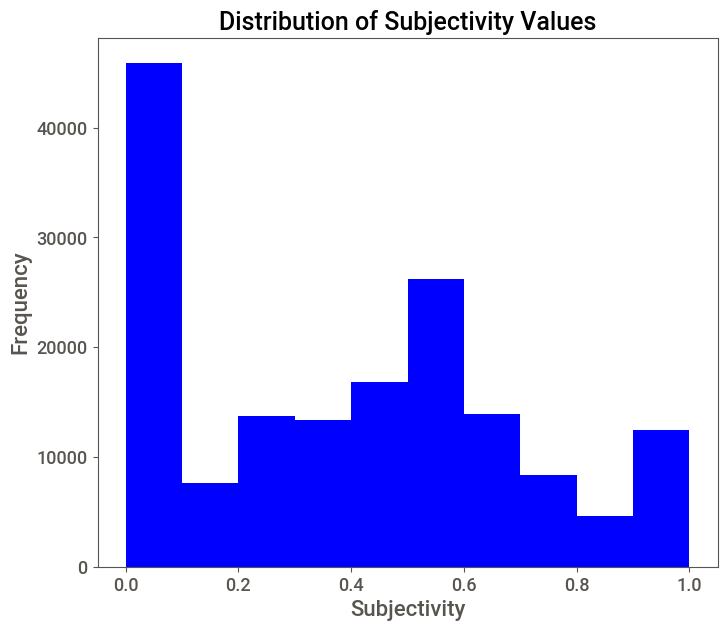

In [24]:
plt.figure(figsize=(8, 7))
tweet['subjectivity'].plot(kind='hist', color='blue', fontsize=13)
plt.xlabel('Subjectivity', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Subjectivity Values', fontsize=18);

**Observations:**

- **Subjectivity** values follow a **normal distribution**.

- The reviews need to be subjective in order to **build** a **robust** sentiment analysis model.

  - Because *objective reviews* will **downgrade** the **performance** of the model.

In [25]:
print('Tweets with 0 Subjectivity:', len(tweet[tweet['subjectivity'] == 0]),'({:.1f}%)'.format(len(tweet[tweet['subjectivity'] == 0])/len(tweet)*100))


Tweets with 0 Subjectivity: 43255 (26.5%)


In [26]:
tweet[tweet['subjectivity']==1]['clean_text'][:7]

29                                                                         agree but only during the tenure modiganga rejuvenation works have started working
35                                                                                                                                                 only modi 
82     mad sandip singh have some sense javed akhtar could have called narendra modi producer sandip ssingh credit row entertainment news the indian express 
94                                                                                                superbly summarizedjai hind vande mataramagain modi sarkar 
122                                                                                                              only this the solution fight with modi wave 
127                                                                                                                                       only modi this time
131                                                 

In [27]:
tweet[tweet['subjectivity']==0.5]['clean_text'][:7]

20     was the one who recently said that people who vote against modi are anti national that put gen hooda all congress supporters and those jawans who not support modi anti national what great things did you hear about him
40                                                                                                                                                             impressive godrej tata complimenting our hoping gets second term 
62                                                                                                                         will these channels say modi also scared contests from two seats even propoganda needs little decency
74                                                                                                    can pit more pictures and videos hindu extremist crime just years but use coz ppl are taken over storm modi and rss terror
93                                                                                                  

In [28]:
tweet[tweet['subjectivity']==0]['clean_text'][:7]

1                                                                 talk all the nonsense and continue all the drama will vote for modi 
5                                                                                             kiya tho refresh maarkefir comment karo 
6                                                        surat women perform yagna seeks divine grace for narendra modi become again\n
7                                                 this comes from cabinet which has scholars like modi smriti and hema time introspect
13    one vote can make all the difference anil kapoor answers modis election 2019 clarion call extends support his vote kar campaign 
14             one vote can make all the difference anil kapoor answers modis election 2019 clarion call extends support his campaign 
16                                                                                                  vote modi who has not created jobs
Name: clean_text, dtype: object

### **Question 6: What should be the Threshold of Subjectivity for the Tweets?** 

- We need to **set** a **threshold** for subjectivity that will allow us to **remove tweets** from the dataset having subjectivity lower than the threshold value.

- We will experiment with **3** different `subjectivity` values: **0.1**, **0.2**, and **0.3**

- There are a total of **162969** tweets in the dataset.

**Tweets having Subjectivity value of 0.1**

In [29]:
for review in tweet[tweet['subjectivity'] == 0.1].sample(5, random_state=1)['clean_text']:
    print(review, '\n')

implies modi will say anything get votes like proper fascist all that matters him power 

india becomes world military power completing congratulations thank you modi for this achievement  

narendra modi koraputodisha its been monthsince and pakistan still counting bodies when india takes action against terrorists enters their home and kills them then some here ask for proof
 

can you answer the statement given chinese mediathis mission was rejected manmohan singh twice his tenure then 2015 prime minister modi said yes for this still your party shamelessly giving credit remote prime minister 

brother when you tweet for topic dont missed hashtag following start hojaigi 



- The reviews are quite **objective** at this point.

In [30]:
print('Proportion of Reviews left after Subjectivity Threshold set to 0.1:', (len(tweet[tweet['subjectivity'] >= 0.1])/len(tweet))*100)

Proportion of Reviews left after Subjectivity Threshold set to 0.1: 71.86397413004927


**Tweets having Subjectivity value of 0.2**

In [31]:
for review in tweet[tweet['subjectivity'] == 0.2].sample(5, random_state=1)['clean_text']:
    print(review, '\n')

question remains highlighting rahuls corruption modis failure taking action  

yes its really grateful time our country this successes lunching antisatellite missile thanks leading you mister prime minister modi this opportunity and manymany succeed scientist team and you 

the called aunty west bengal scared modi she continuously remembering the old mens one asks your opinion ohh this abhivyakti azaadi hey aunty old gold but what about that 2kg gold that you escaped form customs 

modi really tea seller  

there democracy country too thanks modi  



- The **ojectivity** of tweets has **decreased** and sentiment analysis might be easy for human eye.

- But, it will still be **difficult** for a *machine* to **anlyze** the *sentiment* of these tweets at this point.

In [32]:
print('Proportion of Reviews left after Subjectivity Threshold set to 0.2:', (len(tweet[tweet['subjectivity'] >= 0.2])/len(tweet))*100)

Proportion of Reviews left after Subjectivity Threshold set to 0.2: 67.16614816314758


**Tweets having Subjectivity value of 0.3**

In [33]:
for review in tweet[tweet['subjectivity'] == 0.3].sample(5, random_state=1)['clean_text']:
    print(review, '\n')

you and your team the best modi congratulation chowkidar 

the nerves people across the country palpable modi the road for historic win yet again 

modi traffic failed 

congratulations modi india and indians wish you best luck will pray for your victory elections bar 400 par jai hind jai jawan jai vigyaan  

thats why congress mukt bharat very importantplease support modi government  



- The reviews seem to be much **clearer** and **subjective** now.

In [34]:
print('Proportion of Reviews left after Subjectivity Threshold set to 0.3:', (len(tweet[tweet['subjectivity'] >= 0.3])/len(tweet))*100)

Proportion of Reviews left after Subjectivity Threshold set to 0.3: 60.55630211880787


**Observations:**

- Out of the 3 subjectivity values, we get the **best results** when *subjectivity threshold* is set to **0.3**

- The tweets are **subjective** and it is **easy** to **analyze** their *sentiment* as well.

- Also, we will still have about **60%** of the tweets from the dataset, when we set the subjectivity threshold to 0.3

### **Question 7: What are the Most Common Words in Positive Tweets?** 

- For **positive** tweets, we are setting `subjectivity` to **geater than .3** and `polarity` to **1**.

In [35]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White'
                      ).generate(str(tweet[(tweet['subjectivity'] >= .3) &
                                 (tweet['polarity'] == 1)].sample(10000,replace=True, random_state=0)['clean_text']))

(-0.5, 2499.5, 1999.5, -0.5)

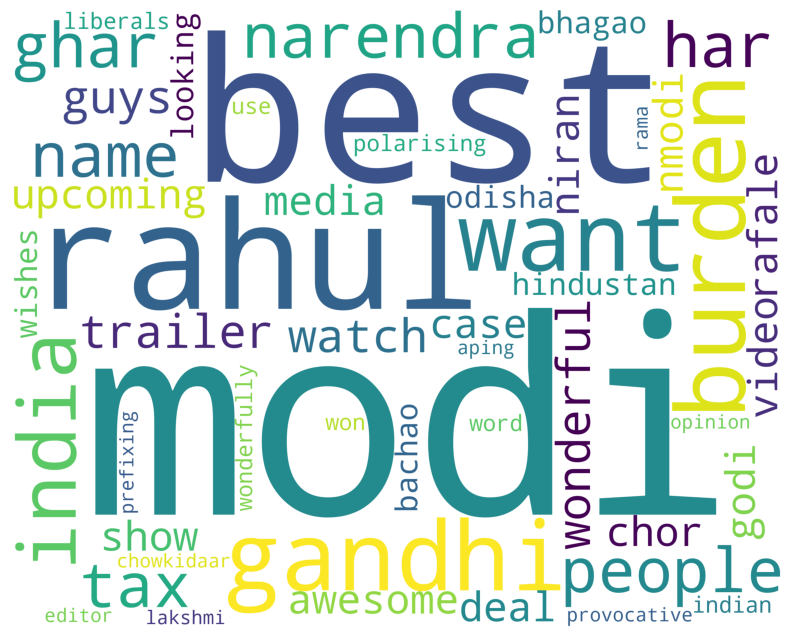

In [36]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')

**Observations:**

- The most common words showing sentiments in the positive tweets are **best**, **burden**, **wondeful**, **bhagao**, etc.


### **Question 8: What are the Most Common Words in Neutral Reviews?** 

- For **neutral** tweets, we are setting `subjectivity` to **greater than .3** and `polarity` to **0**.

In [37]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White'
                      ).generate(str(tweet[(tweet['subjectivity'] >= .3) &
                                 (tweet['polarity'] == 0)].sample(10000,replace=True, random_state=0)['clean_text']))

(-0.5, 2499.5, 1999.5, -0.5)

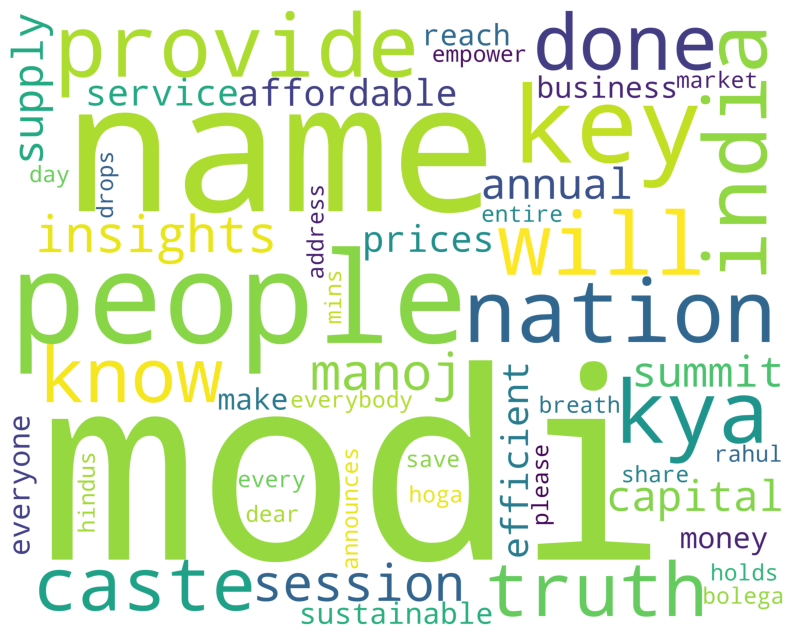

In [38]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')

**Observations:**

- The *most common words for neutral reviews* are **people**, **nation**, **name**, **key**, etc.

- These words **don't express** a **clear sentiment** and hence are appropriate for neutral reviews.

### **Question 9: What are the Most Common Words in Negative Reviews?** 

- For **negative** reviews, we are setting `star_rating` to **1** and `polarity` to **-1**.

In [39]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White'
                      ).generate(str(tweet[(tweet['subjectivity'] >= .3) &
                                 (tweet['polarity'] == -1)]['clean_text']))

(-0.5, 2499.5, 1999.5, -0.5)

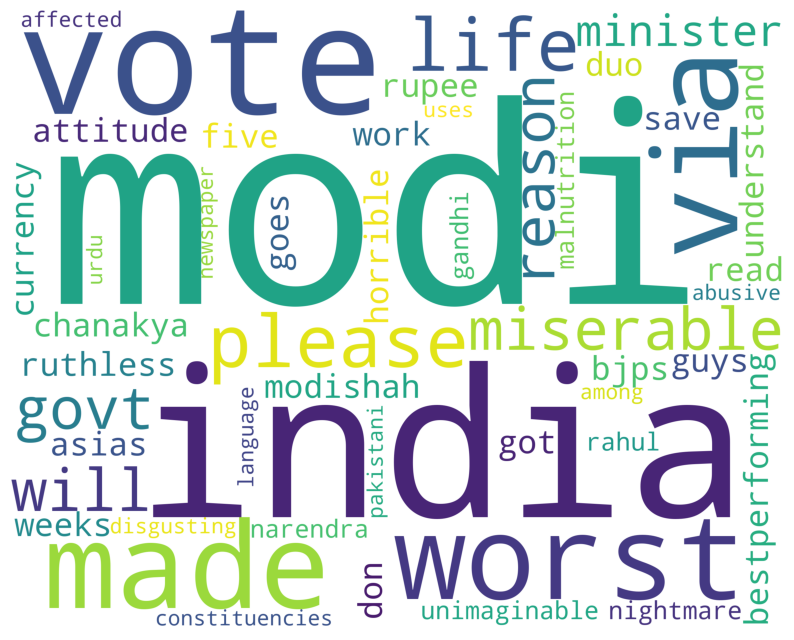

In [40]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')

**Observations:**

- The most common words for negative reviews are **worst**, **miserable**, **terrible**, **ruthless**, **disgusting**, etc.

- These words **clearly express** a **negative emotion** and are appropriate for negative tweets.

This **concludes** our Exploratory Data Analysis.

Now, we will get our dataset ready for **fitting** into Machine Learning Models.

<a id = Section7></a>
## **7. Post Data Processing & Analysis**

- After completing the analysis on the data, we can move on towards fitting our Machine Learning models with our data.

- But, our dataset still contains a lot of **redundant columns** in our data which won't help the model in making predictions.

- Also, we need to **remove samples** having **subjectivity lower than** the *subjectivity threshold* value of **0.3**

- And, we need to create a `sentiment` column containing the **labels** for our machine learning model.

- In this section, we will **remove** all the redundant columns, **drop samples** that doesn't satisfy our selection criteria, and then **create** a `sentiment` column.

- We will also be **splitting** the data into two subsets for training and testing purposes.

<a id = Section701></a>
### **7.1 Removing Redundant Columns**

- We will **remove** every **redundant column** from our dataset.

- We will create a **new dataframe** containing only the **essential features** and use this dataframe down the line.

In [41]:
# Removing redundant columns from reviews_df
essential_df =tweet[['clean_text', 'polarity', 'subjectivity','category']]
essential_df.head()

,clean_text,polarity,subjectivity,category
0,when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples,-0.3000,0.7000,-1.0
1,talk all the nonsense and continue all the drama will vote for modi,0.0000,0.0000,0.0
2,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,0.4833,0.6167,1.0
3,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars,0.1500,0.6583,1.0
4,answer who among these the most powerful world leader today trump putin modi may,0.4000,0.7500,1.0


- The **new dataframe** only contains the **essential** features: `clean_text`, `polarity`, `subjectivity`.

<a id = Section702></a>
### **7.2 Removing Samples Having Subjectivity Less Than 0.3**

- Here, we will **remove** the **samples** having **subjectivity lower than** the subjectivity threshold value of **0.3**

In [42]:
# Checking the current minimum value of subjectivity
essential_df['subjectivity'].min()

0.0

In [43]:
essential_df = essential_df[essential_df['subjectivity'] >= 0.3]

In [44]:
# Checking the minimum value of subjectivity after removing samples
essential_df['subjectivity'].min()

0.3

- The **minimun value** of **subjectivity** has increased from 0 to **0.3**

- We have successfully **removed** every **sample** having *subjectivity less than 0.3*

In [45]:
essential_df.head()

,clean_text,polarity,subjectivity,category
0,when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples,-0.3000,0.7000,-1.0
2,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,0.4833,0.6167,1.0
3,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars,0.1500,0.6583,1.0
4,answer who among these the most powerful world leader today trump putin modi may,0.4000,0.7500,1.0
8,with upcoming election india saga going important pair look current modi leads govt elected with deal brexit combination this weekly looks juicy bears imho,0.2000,0.7000,1.0


<a id = Section801></a>
### **8.1 Model Development and Evaluation**

- In this section, we will be **building** various Machine Learning models and fitting them with the training data and evaluating on test data.

### **8.1.1 Logistic Regression**

In [46]:
#Train Test Split
X=essential_df[['polarity','subjectivity']]
y=essential_df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.30, random_state=1)


In [47]:
#Making a very Basic Model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [48]:
#Predicting sentiments on Train and Test data
y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test)      

In [49]:
#Model Evaluation
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
kk=confusion_matrix(y_test, y_pred_test)
confusion_matri = pd.DataFrame(kk)
confusion_matri.index = ['Negative','Neutral','Positive']
confusion_matri.columns = ['Negative','Neutral','Positive']

display(confusion_matri)
print('classification_report for test data is:\n', classification_report(y_test,y_pred_test))

Accuracy score for train data is: 0.9787206323012116
Accuracy score for test data is: 0.9776404228729693


,Negative,Neutral,Positive
Negative,8299,251,0
Neutral,0,2175,198
Positive,0,213,18471


classification_report for test data is:
               precision    recall  f1-score   support

        -1.0       1.00      0.97      0.99      8550
         0.0       0.82      0.92      0.87      2373
         1.0       0.99      0.99      0.99     18684

    accuracy                           0.98     29607
   macro avg       0.94      0.96      0.95     29607
weighted avg       0.98      0.98      0.98     29607



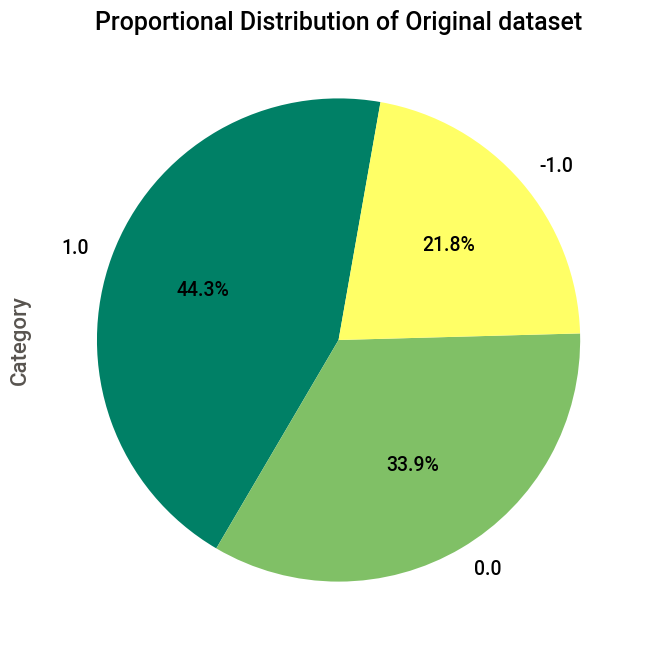

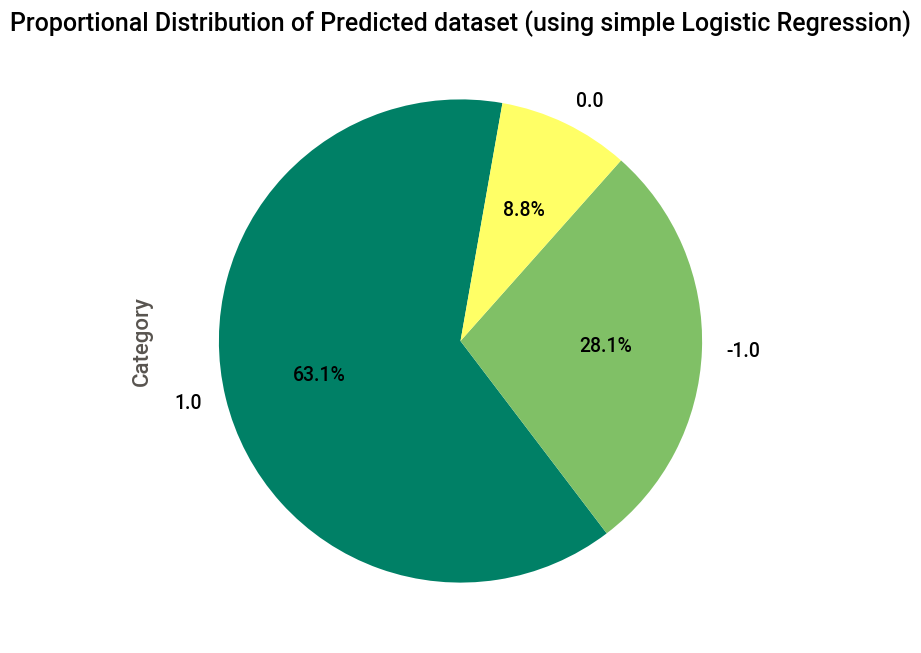

In [60]:
# Plotting the proportional distribution of original tweets
tweet['category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=80, figsize=(8, 8),
                                            fontsize=14, cmap='summer')
plt.ylabel('Category', fontsize=16)
plt.title('Proportional Distribution of Original dataset', fontsize=18)

plt.show()

# Plotting the proportional distribution of predicted tweets
newdis=pd.DataFrame(list(y_pred_train)+list(y_pred_test),columns=['category'])
newdis['category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=80, figsize=(8, 8),
                                            fontsize=14, cmap='summer')
plt.ylabel('Category', fontsize=16)
plt.title('Proportional Distribution of Predicted dataset (using simple Logistic Regression)', fontsize=18);




<a id = Section80102></a>
### **8.1.2 TF-IDF Matrix**

In [61]:
# Define a TF-IDF Vectorizer Object. Remove all english stopwords
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit(list(essential_df['clean_text']))
train, valid = train_test_split(essential_df, test_size=0.3,stratify=essential_df['category'], random_state=42)
train_abs = tf.transform(train['clean_text'])
valid_abs = tf.transform(valid['clean_text'])
                      

In [62]:
#Processing may take around 2 min

#Evaluating TF-IDF on Logistic Regression
clf = LogisticRegression()
clf.fit(train_abs, train['category'])
train_preds=clf.predict(train_abs)
valid_preds = clf.predict(valid_abs)

In [63]:
#Model Evaluation
print('Accuracy score for train data is:', accuracy_score(train['category'],train_preds))
print('Accuracy score for test data is:', accuracy_score(valid['category'],valid_preds))
kk=confusion_matrix(valid['category'], valid_preds)
confusion_matri = pd.DataFrame(kk)
confusion_matri.index = ['Negative','Neutral','Positive']
confusion_matri.columns = ['Negative','Neutral','Positive']

display(confusion_matri)
print('classification_report for test data is:\n', classification_report(valid['category'],valid_preds))

Accuracy score for train data is: 0.9172855054211723
Accuracy score for test data is: 0.818927956226568


,Negative,Neutral,Positive
Negative,5863,19,2668
Neutral,155,371,1847
Positive,641,31,18012


classification_report for test data is:
               precision    recall  f1-score   support

        -1.0       0.88      0.69      0.77      8550
         0.0       0.88      0.16      0.27      2373
         1.0       0.80      0.96      0.87     18684

    accuracy                           0.82     29607
   macro avg       0.85      0.60      0.64     29607
weighted avg       0.83      0.82      0.80     29607



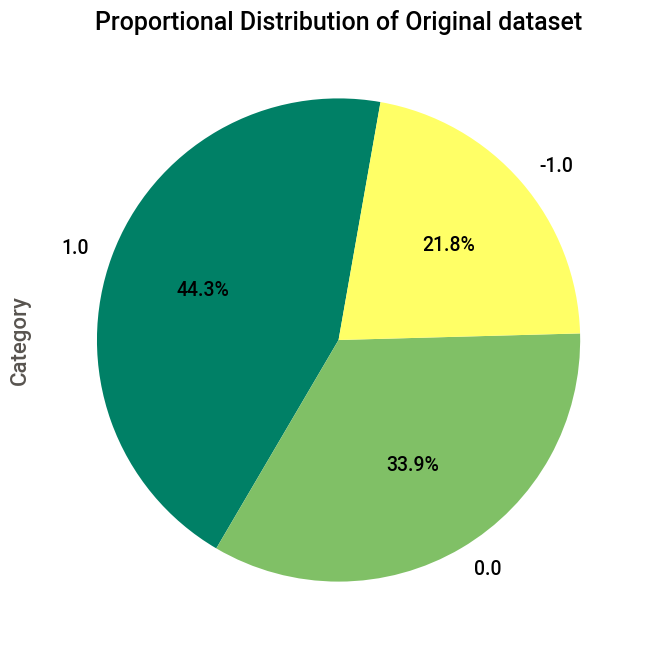

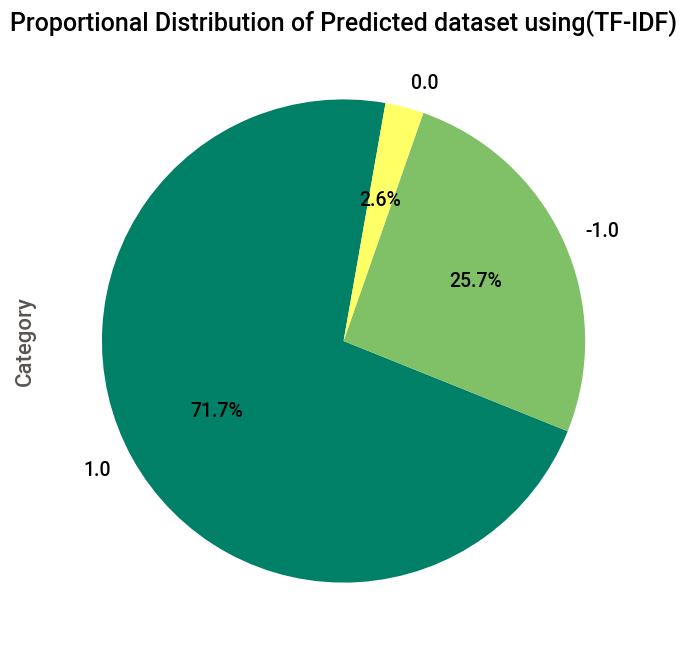

In [65]:
# Plotting the proportional distribution of original tweets
tweet['category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=80, figsize=(8, 8),
                                            fontsize=14, cmap='summer')
plt.ylabel('Category', fontsize=16)
plt.title('Proportional Distribution of Original dataset', fontsize=18)
plt.show()

# Plotting the proportional distribution of predicted tweets
newdis=pd.DataFrame(list(train_preds)+list(valid_preds),columns=['category'])
newdis['category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=80, figsize=(8, 8),
                                            fontsize=14, cmap='summer')
plt.ylabel('Category', fontsize=16)
plt.title('Proportional Distribution of Predicted dataset using(TF-IDF)', fontsize=18);

<a id = Section80103></a>
### **8.1.3 K-Means**

- Now, we will create a `sentiment` column which will provide the labels for our training samples used in the Machine Learning models.

- We will use both the `subjectivity` and `polarity` values to **divide** our tweets into different **sentiments**.

- We will use KMeans to check on which `subjectivity` and `polarity` values to **divide** our tweets into different **sentiments**.

Wall time: 1min


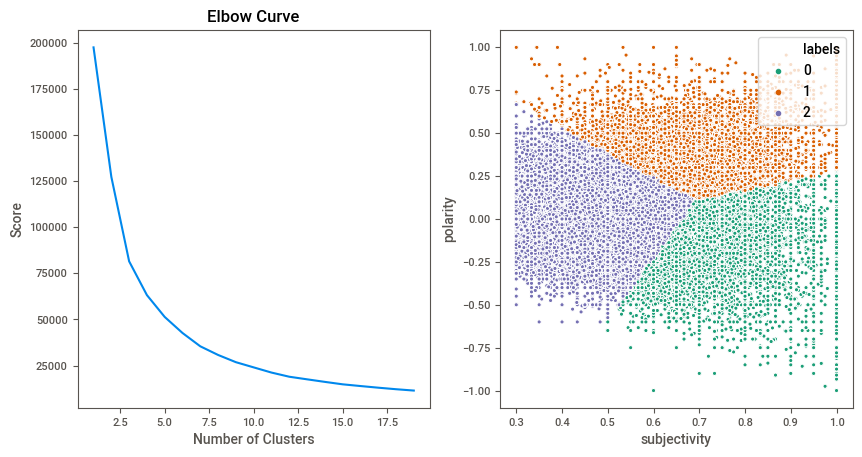

In [66]:
%%time
#Processing may take 2 min
Mergedf=essential_df.copy()
review_data_mod = essential_df[['subjectivity','polarity']]
review_data_std = stats.zscore(review_data_mod)
review_data_std = np.array(review_data_std)
number_of_clusters = range(1,20)
kmeans = [KMeans(n_clusters=i, max_iter=1000, random_state=42) for i in number_of_clusters]
score = [-1*kmeans[i].fit(review_data_std).score(review_data_std) for i in range(len(kmeans))]
k_means_test = KMeans(n_clusters=3, max_iter=1000, random_state=42)
-1*k_means_test.fit(review_data_std).score(review_data_std)
Mergedf['labels'] = k_means_test.labels_
fig, axes = plt.subplots(1, 2,figsize=(10,5))
axes[0].plot((number_of_clusters), score)
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Score')
axes[0].set_title('Elbow Curve')
    
sns.scatterplot('subjectivity','polarity',data=Mergedf,hue='labels',ax=axes[1],palette='Dark2',sizes=(180,180))
axes[1].legend(loc='upper right');

- Since our target variables are 'Positive','Negative'and 'Neutral',we will workout the three categories based on polarity and subjectivity thresholds

- the convergence point for three categories is at approx **0 Polarity and 0.7 subjectivity**

87555                                                                                                                                                                    modi stopped foreign funding churches that decreased the ongoing conversion business
19484                                                                                                                     only modi established all the iits iims research center oped economy 1991 and isro before that india dint even know how grow potato
50769                                                                                                                                 and need modi for atleast another terms else will total mess dsarray the super corrupt gang……not named – its understood
110882                             narendra modi condition pathetic that his entire years has nothing put and limited hide behind army adventuresmodi what did achieve politically with pak other than surgical marriage visit least convince 

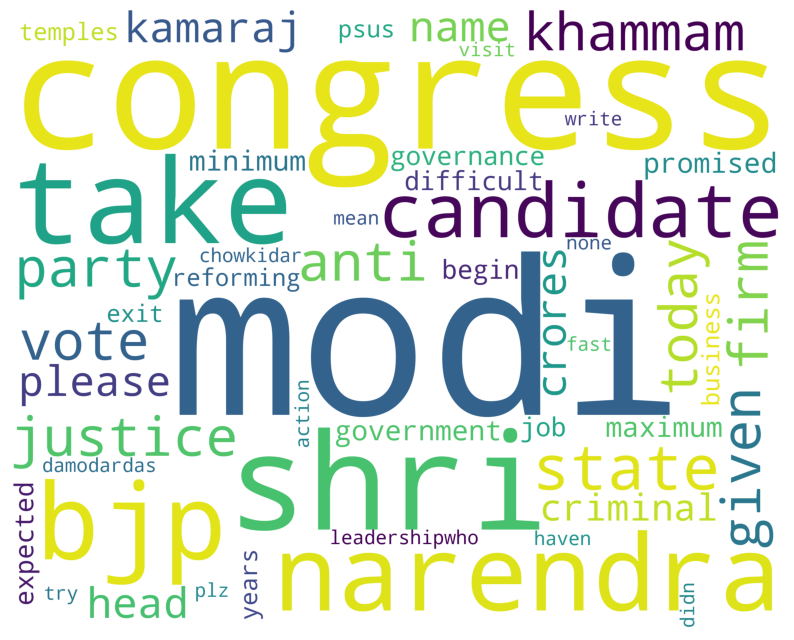

In [67]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White'
                      ).generate(str(essential_df[(essential_df['polarity'] <=0) &
                                 (essential_df['subjectivity'] <=0.7)]['clean_text']))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
essential_df[(essential_df['polarity'] <= 0) & (essential_df['subjectivity'] <=0.7)]['clean_text'].sample(10)

125899                                                 priyanka gandhi lies about mgnrega target the modi government here are the facts congress khandaan born out lies false fake
90647                                                                                                                           because modi knows situation ground all time worst
106921                                                                                                                                                               modi only bjp
28722     felt very bad the people bhakts and modi asking certificate nationalism sam pitroda feel sorry for them this beyond shame god will give them brain love peace mind heart
13396          not only ask people vote did some buttering modi while did that that why people are upset about dont act like did nothing you too what happening around the country
44210                                                               wtf\nwhat was announced isro modi mad

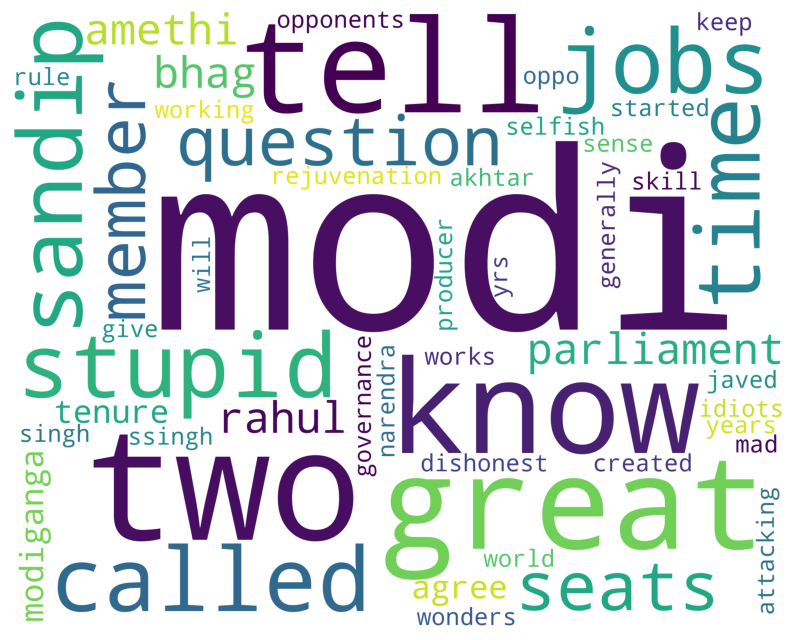

In [68]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White'
                      ).generate(str(essential_df[(essential_df['polarity'] <= 0) &
                                 (essential_df['subjectivity'] >0.7)]['clean_text']))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
essential_df[(essential_df['polarity'] <= 0) & (essential_df['subjectivity'] >0.7)]['clean_text'].sample(10)

- One of our **convergence point is polarity<0 at all subjectivity values can be termed 'Negative'**

102255                                                                                                                             ‘modi’ win inevitable poll 2019’ saturn disciplirain sets arithmetic degrees sagitarius astrologer anil aggarwala 
139812                                                                                       official slammed madras for ‘fraud’ involving jayalalithaa’ thumb impression was panel which gave clean chit modi mission shakti mcc violation case via 
102530                                                                                                                                                                                   days vote for corruption free and tollerant india only modi 
72225                                                                                              free fair elections has now become book language only has relation with ground reality people india propaganda wrong doing are trademark modi govt
152347          

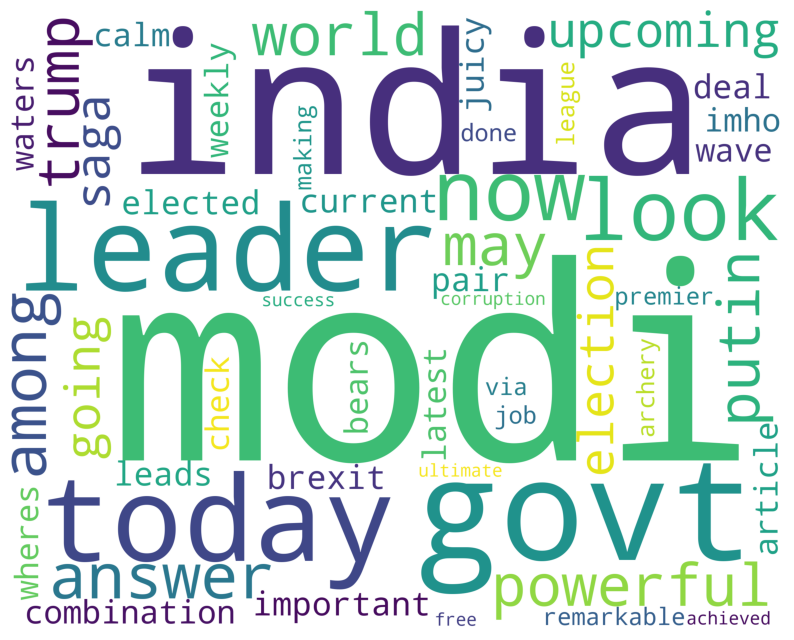

In [69]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White'
                      ).generate(str(essential_df[(essential_df['polarity'] > 0) & (essential_df['polarity'] <= 0.5) &
                                 (essential_df['subjectivity'] >=0.7)]['clean_text']))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
essential_df[(essential_df['polarity'] > 0) & (essential_df['polarity'] <= 0.5) & (essential_df['subjectivity'] >=0.7)]['clean_text'].sample(10)

157731                                                                                                                                                               anyone who voting for modi anti national here they are directly opposing army man 
147322                                                               congress has bloody leader worthy politicians left anymore nda’ present cabinet far the best india has seen ministers like many more along with are worth vote for ’ not just modi
36232                                                                                          indias newly aggressive strategy has seen modi visit eight middle eastern countries and territories since 2014 more than his four predecessors combined 
103191                          director asked then newcomer kangana ranaut wear robe without any underwear for his film\nwho very modi picked censor board chief sanskari pahlaj nihalani who then decided the length sanskari kisses name hypocrisy\n
63417   

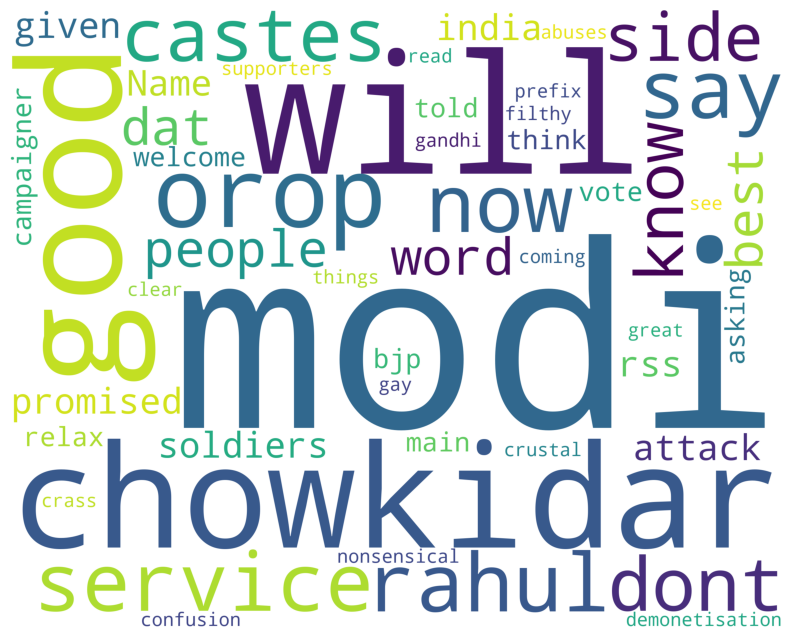

In [70]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White'
                      ).generate(str(essential_df[(essential_df['polarity'] > 0) & (essential_df['polarity'] <= 0.5) &
                                 (essential_df['subjectivity'] <0.7)]['clean_text']))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
essential_df[(essential_df['polarity'] > 0) & (essential_df['polarity'] <= 0.5) & (essential_df['subjectivity'] <0.7)]['clean_text'].sample(10)

- Other convergence point is **polarity>0 and polarity<0.5 at all subjectivity values can be termed 'Neutral'**

88589                                                                                                                                                                                   this chowkidaar welcome chowkidaar jammu 
19209                                                                                                                                   feeling proud have like modi feeling safe since you hold post thank for strong leadership
84956                                                                                                           when cbi raid happen then why blaming modi the credit should honest officials they are working against corruption
113036                                                                                                                       you have already given don’ disheartened nyay scheme still modi can scape through with 200 seats win
143357                                                                remember leader mallikarju

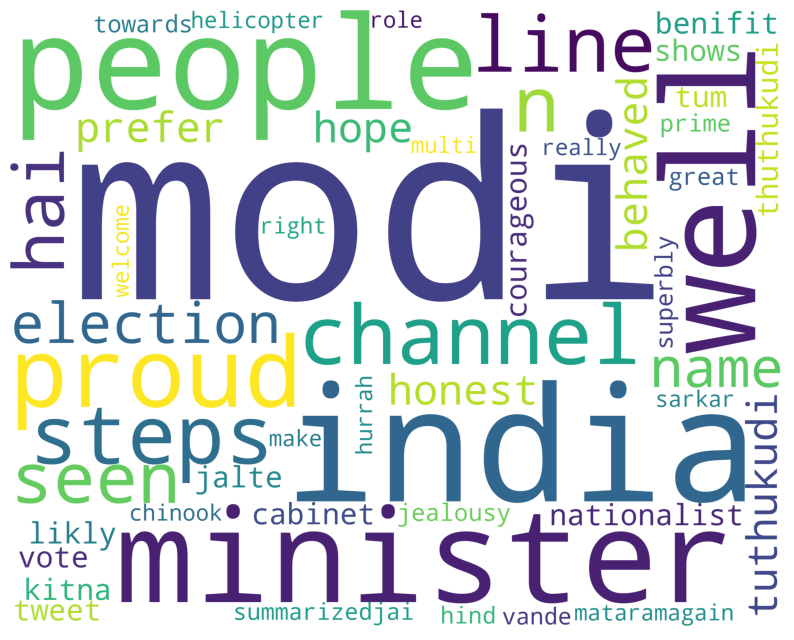

In [71]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White'
                      ).generate(str(essential_df[(essential_df['polarity'] > 0.5)]['clean_text']))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
essential_df[(essential_df['polarity'] > 0.5)]['clean_text'].sample(10)

- Third convergence point is **polarity>0.5 at all subjectivity values can be termed 'Positive'**
- Now start creating our Sentiments Dataset

In [72]:
positive_df = essential_df[(essential_df['polarity'] >= 0.5)]

In [73]:
positive_df['sentiment'] = 'positive'

In [74]:
positive_df.head()

,clean_text,polarity,subjectivity,category,sentiment
11,hope tuthukudi people would prefer honest well behaved nationalist courageous likly minister modi cabinet vote benifit thuthukudi,0.6,0.90,1.0,positive
36,check out latest article premier archery league via,0.5,0.90,1.0,positive
40,impressive godrej tata complimenting our hoping gets second term,0.5,0.50,1.0,positive
74,can pit more pictures and videos hindu extremist crime just years but use coz ppl are taken over storm modi and rss terror,0.5,0.50,1.0,positive
79,kitna jalte tum modi your tweet shows your jealousy towards our great prime minister modi,0.8,0.75,1.0,positive


In [75]:
neutral_df = essential_df[(essential_df['polarity'] >= 0) & (essential_df['polarity'] < 0.5)]

In [76]:
neutral_df['sentiment'] = 'neutral'

In [77]:
neutral_df.head()

,clean_text,polarity,subjectivity,category,sentiment
2,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,0.4833,0.6167,1.0,neutral
3,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars,0.1500,0.6583,1.0,neutral
4,answer who among these the most powerful world leader today trump putin modi may,0.4000,0.7500,1.0,neutral
8,with upcoming election india saga going important pair look current modi leads govt elected with deal brexit combination this weekly looks juicy bears imho,0.2000,0.7000,1.0,neutral
9,gandhi was gay does modi,0.4167,0.5833,1.0,neutral


In [78]:
negative_df = essential_df[(essential_df['polarity'] < 0)]

In [79]:
negative_df['sentiment'] = 'negative'

In [80]:
negative_df.head()

,clean_text,polarity,subjectivity,category,sentiment
0,when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples,-0.3000,0.7000,-1.0,negative
15,vote such party and leadershipwho can take fast and firm action none other than narendra damodardas modi and bjp party,-0.0050,0.3950,-1.0,negative
19,didn’ write chowkidar does mean ’ anti modi try visit the plz not all who haven’ used are anti,-0.3125,0.6875,-1.0,negative
21,with firm belief the leadership shri narendra modi bjp entering into politics given form file nomination for the khammam parliamentary seat proceeding khammam today,-0.2000,0.4000,-1.0,negative
23,sultanpur uttar pradesh loksabha candidate select pawan kumar pandey actually public want given vote modi but your current condidate not popular district your candidate bsp candidate sonbhadra singh,-0.1000,0.4556,-1.0,negative


- **Joining** all **3** dataframes to create our final dataset.

In [81]:
sentiment_df = pd.concat([positive_df, neutral_df, negative_df], ignore_index=True)
sentiment_df.head()

,clean_text,polarity,subjectivity,category,sentiment
0,hope tuthukudi people would prefer honest well behaved nationalist courageous likly minister modi cabinet vote benifit thuthukudi,0.6,0.90,1.0,positive
1,check out latest article premier archery league via,0.5,0.90,1.0,positive
2,impressive godrej tata complimenting our hoping gets second term,0.5,0.50,1.0,positive
3,can pit more pictures and videos hindu extremist crime just years but use coz ppl are taken over storm modi and rss terror,0.5,0.50,1.0,positive
4,kitna jalte tum modi your tweet shows your jealousy towards our great prime minister modi,0.8,0.75,1.0,positive


In [82]:
sentiment_df.tail()

,clean_text,polarity,subjectivity,category,sentiment
98683,when narender modi contested two seats was not member parliament anytime but rahul pappu gandhi member parliament two times from amethi contesting two seats because saw difficult fool amethi people anymore bhag rahul bhag,-0.5000,1.0000,-1.0,negative
98684,modi decimates congress front crores congress head shares funny videos and memes congress loses elections congress head evms were hacked,-0.0250,0.5500,-1.0,negative
98685,azamgarh please poor working requirement jogiadhiyanath and narendar modi office delhi,-0.4000,0.6000,-1.0,negative
98686,why these 456 crores paid neerav modi not recovered from congress leaders this hard earned money tax payers,-0.2917,0.5417,-1.0,negative
98687,dear rss terrorist payal gawar what about modi killing 1000 plus muslims listen dysfunctional little pest take your pea size brain bleat somewhere else anyone who commits crime criminal irrespective hindumuslim stop giving criminals religious twist,-0.1958,0.4333,-1.0,negative


- The final dataset contains the **selected tweets** along with their respective **sentiments** with 98688 rows.

In [83]:
sentiment_df.shape

(98688, 5)

**Proportional Distribution of Sentiments**

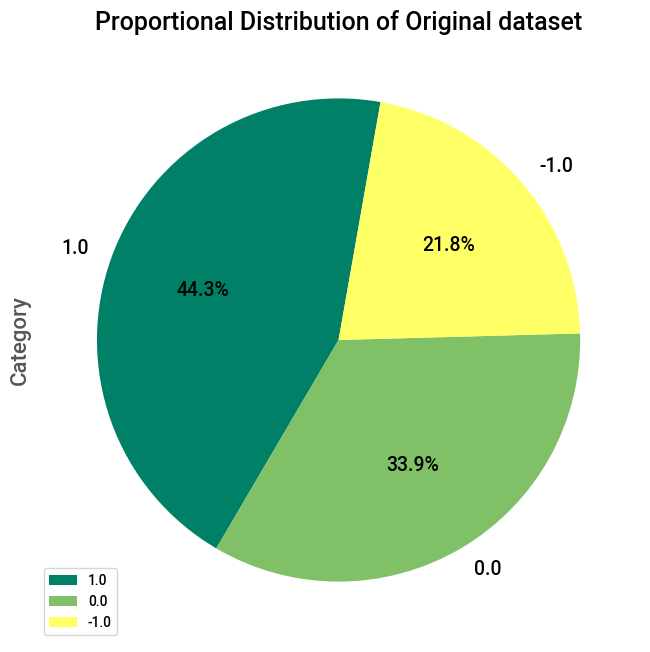

Text(0.5, 1.0, 'Proportional Distribution of Sentiments(using K-means)')

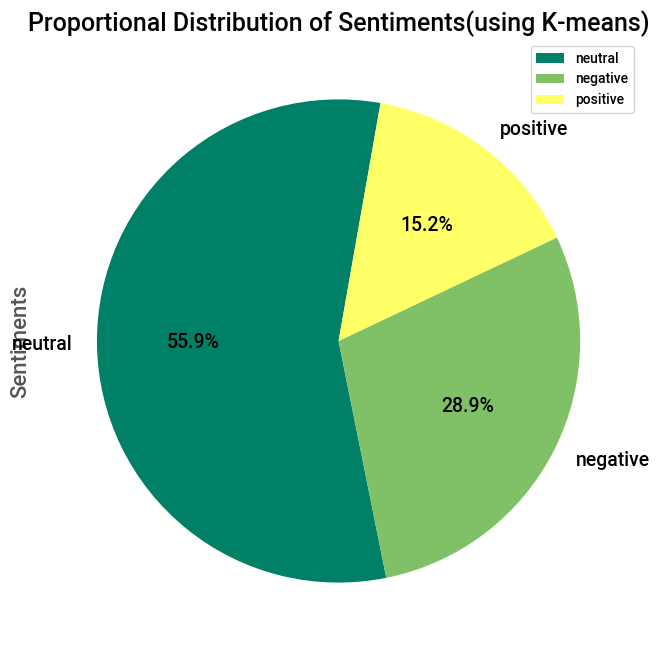

In [84]:
# Plotting the proportional distribution of original tweets
tweet['category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=80, figsize=(8, 8),
                                            fontsize=14, legend=True, cmap='summer')
plt.ylabel('Category', fontsize=16)
plt.title('Proportional Distribution of Original dataset', fontsize=18)
plt.show()

# Plotting the proportional distribution of sentiments
sentiment_df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=80, figsize=(8, 8),
                                            fontsize=14, legend=True, cmap='summer')
plt.ylabel('Sentiments', fontsize=16)
plt.title('Proportional Distribution of Sentiments(using K-means)', fontsize=18)

**Observations:**

- Our final dataset contains about **15.2% positive** tweets, **28.9% negative** tweets, and **55.9% neutral** tweets.

<a id = Section9></a>
## **9. Conclusion**

- We cleaned the tweets by:
  - **Removing** some Nan values.

- Then, we calculate the **polarity** and **subjectivity** values for each review.

- This allowed us to **analyze** our data **in-depth** using NLP libraries.

- We also calculated a **threshold** for the **subjectivity** value in our tweets.

- We then found out the **most common words** associated with different sentiments.

- After analyzing the data:
  
  - **Remove** all the **samples** having **subjectivity less than 0.3** i. e. the subjectivity threshold.

  - **Evaluate tweets Sentiments using different ML models** based on clean_text, subjectivity and polarity.


- During model building, we first created a **Logistic Regression Model** of our data and **got a good performance on train and test sets.**(though more model like Decision tree Classifier, SVR and random forest still need to be explored)

- During Second model building, we created a **TF-IDF matrix** and evaluated its performance using logistic regression but the model didn't perform at par as compared to First Model.
  
- At last, we used a **K Means** model to make sentiment predictions on  our data.
  
  - The K means model was **slower**  gave **worse results** as we need to do an indepth study using different k values.

- So, among three models **Logistic regression** gave the Best results and we will mark it as our **Best out of the3 Models".